# 유튜브 랭킹 시각화

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["font.family"] = 'Malgun Gothic'


In [31]:
df = pd.read_csv('유튜브랭킹.csv')
df.head(3)

,순위,카테고리,채널명,구독자 수,조회 수,비디오 수
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,"1,646"


In [32]:
df['구독자 수'] = df['구독자 수'].astype(int)
df['조회 수'] = df['조회 수'].astype(np.int64)
df['비디오 수'] = df['비디오 수'].apply(lambda x : x.replace(',','')).astype(int)

In [34]:
df.head(3)

,순위,카테고리,채널명,구독자 수,조회 수,비디오 수
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,1646


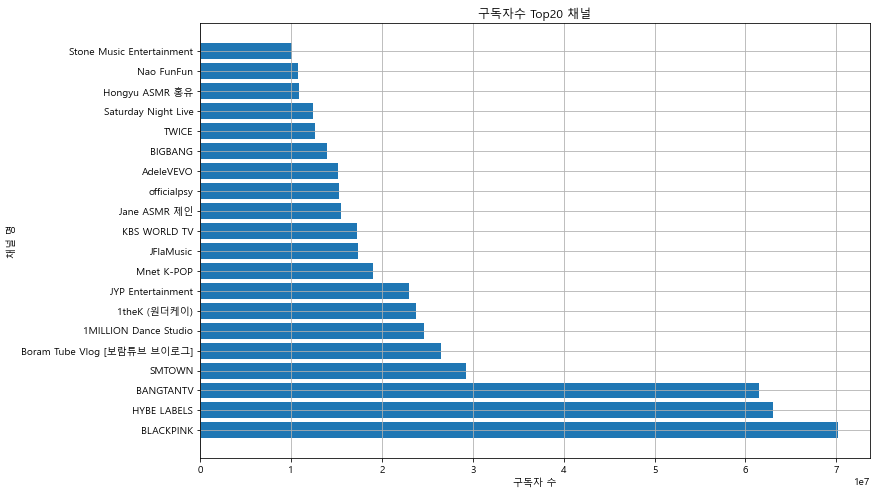

In [42]:
plt.figure(figsize=(12,8))
plt.barh(df['채널명'].head(20), df['구독자 수'].head(20))
plt.title('구독자수 Top20 채널')
plt.grid()
plt.xlabel('구독자 수')
plt.ylabel('채널 명')
plt.show()

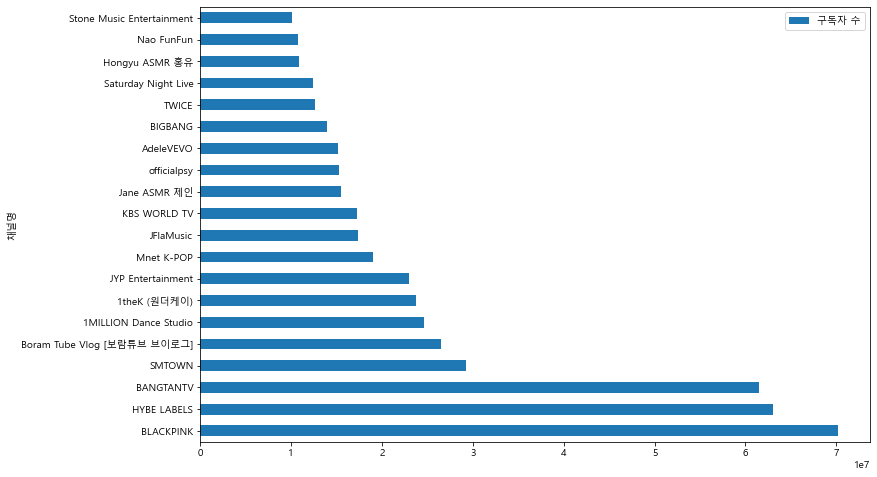

In [46]:
df2 = df[['채널명','구독자 수']].head(20)
df2.set_index('채널명',inplace=True)
df2.plot(kind='barh', grid=True, figsize=(12,8))
plt.grid()
plt.show()

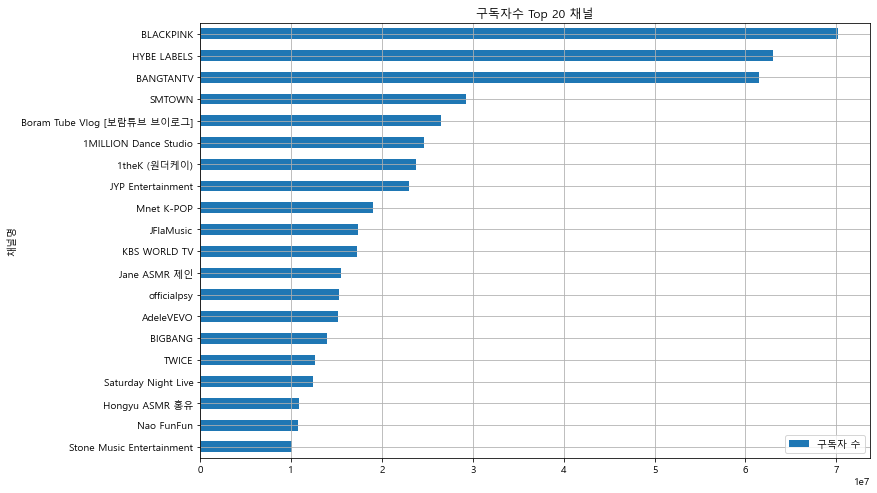

In [47]:
df2.sort_values(by='구독자 수').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구독자수 Top 20 채널')
plt.show()

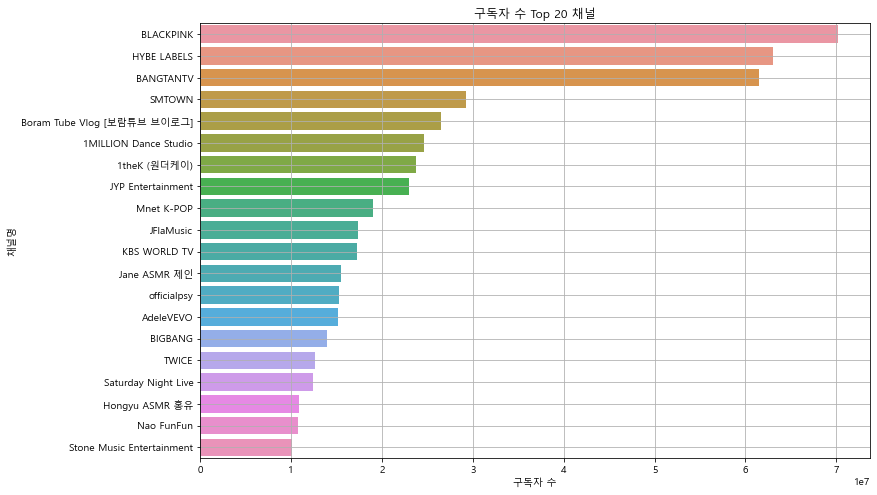

In [56]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(y='채널명',x = '구독자 수',data = df.head(20))
plt.title('구독자 수 Top 20 채널')
plt.grid()
plt.show()

- ### 조회수 기준으로 Top20 채널 시각화

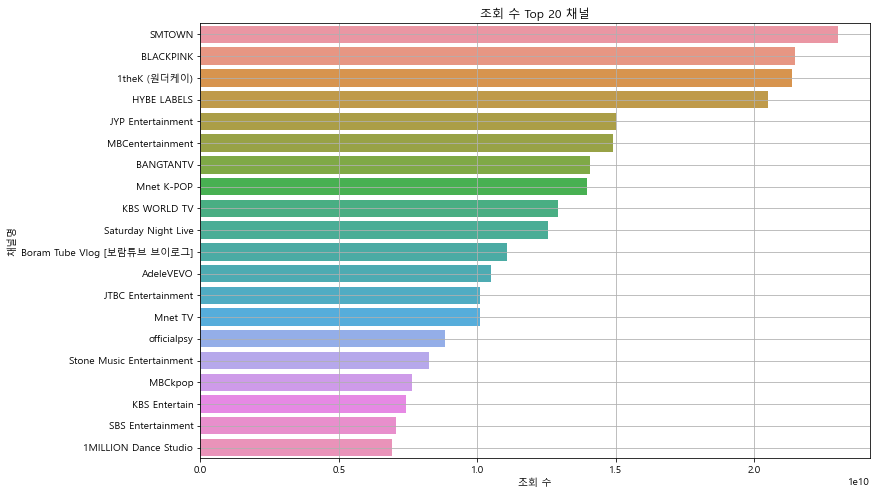

In [63]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='조회 수',ascending=False).head(20)
sns.barplot(y='채널명',x = '조회 수',data = df2)
plt.title('조회 수 Top 20 채널')
plt.grid()
plt.show()

- ### 비디오 기준으로 Top20 채널 시각화

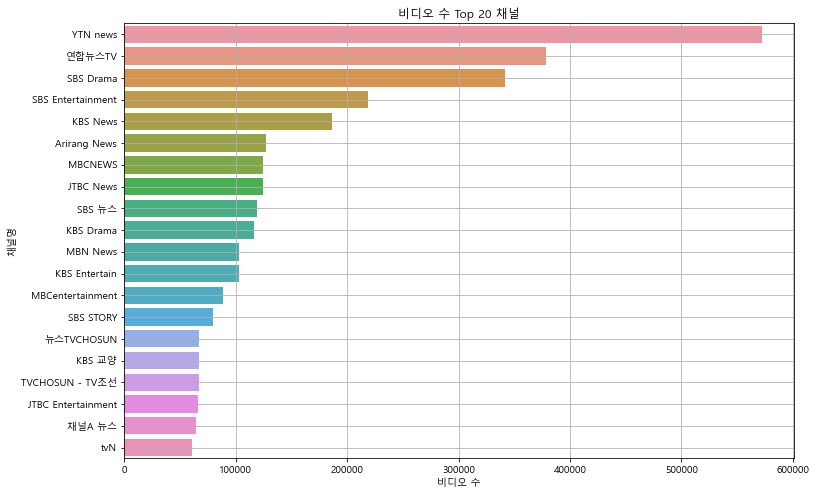

In [64]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='비디오 수',ascending=False).head(20)
sns.barplot(y='채널명',x = '비디오 수',data = df2)
plt.title('비디오 수 Top 20 채널')
plt.grid()
plt.show()

 - 카테고리 별 채널 수

In [71]:
df3 = df.카테고리.value_counts().to_frame()
df3


,카테고리
음악/댄스/가수,172
TV/방송,144
미분류,126
키즈/어린이,89
음식/요리/레시피,83
게임,70
BJ/인물/연예인,66
뉴스/정치/사회,53
패션/미용,42
취미/라이프,37


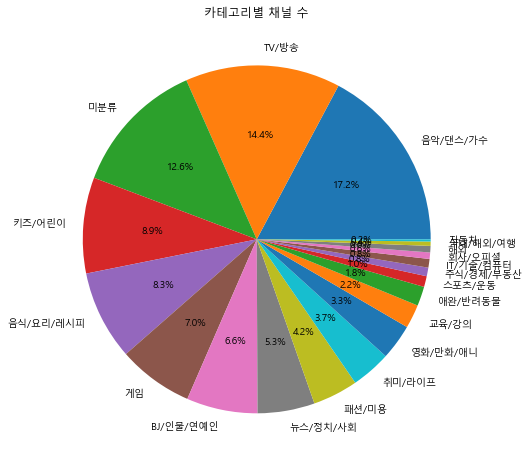

In [117]:
df3 = df.카테고리.value_counts().to_frame().head(20)

plt.figure(figsize=(12,8))
plt.pie('카테고리', labels = df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널 수')
plt.show()

- ### 카테고리 별 구독자 수 시각화

In [112]:
df4 = df.groupby('카테고리')['구독자 수'].sum().to_frame().head(20)
df4

,구독자 수
카테고리,
BJ/인물/연예인,93710000
IT/기술/컴퓨터,8410000
TV/방송,241660000
게임,70960000
교육/강의,24740000
국내/해외/여행,3790000
뉴스/정치/사회,75100000
미분류,133330000
스포츠/운동,14850000


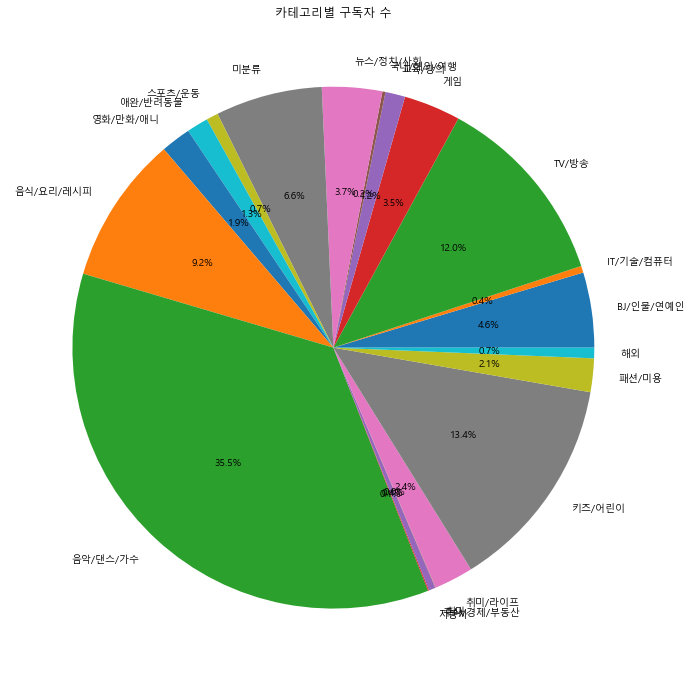

In [120]:
df4 = df.groupby('카테고리')['구독자 수'].sum().to_frame().head(20)
plt.figure(figsize=(18,12))
plt.pie('구독자 수', labels = df4.index, data=df4, autopct='%.1f%%')
plt.title('카테고리별 구독자 수')
plt.show()